In [328]:
# !pip install googletrans==3.1.0a0
# !pip install vaderSentiment
# !pip install pandas
# !pip install nltk
# !pip install autocorrect
# !pip install matplotlib
# !pip install deep_translator
# !pip install scikit-learn
# !pip install numpy
# !pip install researchpy
# !pip install imbalanced-learn
# !pip install seaborn
# !pip install textblob
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn
# !pip install afinn

     ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
     ---------------------------------------- 52.6/52.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53437 sha256=c8fc2252e830b488950e07fd3b413d8309df59a03b9220e574dc911cb64e7d03
  Stored in directory: c:\users\ihand\appdata\local\pip\cache\wheels\ee\d3\a0\f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


In [183]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import numpy as np
from autocorrect import Speller
from googletrans import Translator, constants
from matplotlib import pyplot as plt
import re
from deep_translator import GoogleTranslator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from textblob import TextBlob

# Download necessary NLTK resources, uncomment if needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize objects for text processing
lemmatizer = WordNetLemmatizer()
spell_checker = Speller()
translator = Translator()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ihand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ihand\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ihand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [184]:
df = pd.read_excel('IMB767(Enhancing Visitor Experience at ISKON,spreadsheet).xlsx', sheet_name = 'data')
df

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,814,Trip Advisor,maryd1928,2013-01-02,Don't miss this Bangalore Temp,Don't miss this Gaudiya Vaishnava Temple locat...,5,POSITIVE
1,1181,Trip Advisor,maryd1928,2013-01-02,Don't miss this Bangalore Temple,Don't miss this Gaudiya Vaishnava Temple locat...,5,POSITIVE
2,813,Trip Advisor,shoubhik,2013-01-05,peacefull and devotional,This was my 2nd visit to the temple.. last tim...,4,POSITIVE
3,1182,Trip Advisor,shoubhik,2013-01-05,peacefull and devotional,This was my 2nd visit to the temple.. last tim...,4,POSITIVE
4,812,Trip Advisor,onthemoveBangalore,2013-01-10,Huge and Grand,The Iskcon temple is a rather grand and imposi...,5,POSITIVE
...,...,...,...,...,...,...,...,...
5680,5685,Trip Advisor,disheet p,2017-08-11,Feeling blessed,Good,5,POSITIVE
5681,5682,Google + HK HILL,Gangaraju L,2017-08-11,NaN,Excellent,4,POSITIVE
5682,5684,Google + HK HILL,R Sivakumar,2017-08-11,NaN,Visited with friends on 12 Aug 2017. Not much ...,5,POSITIVE
5683,5686,Trip Advisor,Lalengmawia V,2017-08-12,Not interesting,Its a very beautiful temple . if you are a tou...,3,NEUTRAL


# Question 1

Identify the Duplicate Reviews by the Same Person (identified by REVIEW BY) on the Same Day.

In [185]:
duplicates = df.duplicated(subset=['REVIEW BY', 'REVIEW DATE'], keep='first')
df[duplicates]

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
1,1181,Trip Advisor,maryd1928,2013-01-02,Don't miss this Bangalore Temple,Don't miss this Gaudiya Vaishnava Temple locat...,5,POSITIVE
3,1182,Trip Advisor,shoubhik,2013-01-05,peacefull and devotional,This was my 2nd visit to the temple.. last tim...,4,POSITIVE
5,1183,Trip Advisor,onthemoveBangalore,2013-01-10,Huge and Grand,The Iskcon temple is a rather grand and imposi...,5,POSITIVE
7,1184,Trip Advisor,RobertBorchers,2013-01-12,Interesting temple for foreigners,Interesting temple with lots of shop. Very dif...,4,POSITIVE
9,1185,Trip Advisor,shariffmim,2013-01-14,peace..,had been to dis place with my frnds and got to...,5,POSITIVE
...,...,...,...,...,...,...,...,...
5111,5109,Google + HK HILL,udit peshkar,2017-06-10,NaN,Nice place for all devotional people,5,POSITIVE
5112,5110,Google + HK HILL,udit peshkar,2017-06-10,NaN,This is a very calm and quiet place. The campu...,5,POSITIVE
5417,5448,Trip Advisor,arunmanir,2017-07-10,Wow temple to visit in bangalore,This is a beautiful temple located on a small ...,5,POSITIVE
5460,5483,Google + HK HILL,manoj rajanna,2017-07-12,NaN,It's offers you the peace and quiet you'd want...,4,POSITIVE


Keep the First Occurrence of Duplicate Reviews by the Same Person (identified by REVIEW BY) on the Same Day.

In [186]:
df1 = df.drop_duplicates(subset=['REVIEW BY', 'REVIEW DATE'], keep='first')
df1

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,814,Trip Advisor,maryd1928,2013-01-02,Don't miss this Bangalore Temp,Don't miss this Gaudiya Vaishnava Temple locat...,5,POSITIVE
2,813,Trip Advisor,shoubhik,2013-01-05,peacefull and devotional,This was my 2nd visit to the temple.. last tim...,4,POSITIVE
4,812,Trip Advisor,onthemoveBangalore,2013-01-10,Huge and Grand,The Iskcon temple is a rather grand and imposi...,5,POSITIVE
6,808,Trip Advisor,RobertBorchers,2013-01-12,Interesting temple for foreign,Interesting temple with lots of shop. Very dif...,4,POSITIVE
8,762,Trip Advisor,shariffmim,2013-01-14,peace..,had been to dis place with my frnds and got to...,5,POSITIVE
...,...,...,...,...,...,...,...,...
5680,5685,Trip Advisor,disheet p,2017-08-11,Feeling blessed,Good,5,POSITIVE
5681,5682,Google + HK HILL,Gangaraju L,2017-08-11,NaN,Excellent,4,POSITIVE
5682,5684,Google + HK HILL,R Sivakumar,2017-08-11,NaN,Visited with friends on 12 Aug 2017. Not much ...,5,POSITIVE
5683,5686,Trip Advisor,Lalengmawia V,2017-08-12,Not interesting,Its a very beautiful temple . if you are a tou...,3,NEUTRAL


# Question 2

Identify and Keep the First Occurrence of Reviews by the Same Person (identified by REVIEW BY) Within a 7-day Interval.

In [187]:
df1['REVIEW DATE'] = pd.to_datetime(df1['REVIEW DATE'])

# Create an empty DataFrame to store the first occurrences of reviews
df2 = pd.DataFrame(columns=df1.columns)

# Iterate over each unique reviewer
for reviewer, group in df1.groupby('REVIEW BY'):
    # Sort the group by date
    group = group.sort_values('REVIEW DATE')

    # Take the first review
    last_review_date = group.iloc[0]['REVIEW DATE']
    df2 = df2.append(group.iloc[0])

    # Iterate over the rest of the reviews
    for _, row in group.iterrows():
        # If the current review is more than 7 days after the last review date, take it as the first occurrence
        if (row['REVIEW DATE'] - last_review_date).days > 7:
            df2 = df2.append(row)
            # Update the last review date
            last_review_date = row['REVIEW DATE']

# Reset index of the resulting DataFrame
df2.reset_index(drop=True, inplace=True)
df2

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,656,Trip Advisor,3612,2014-04-30,To commercial,This reativly new temple was a big hindu versi...,2,NEGATIVE
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Superr,5,POSITIVE
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,Giving 3 stars because I felt its more of a sh...,4,NEGATIVE
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,A best peaceful place with great infrastructur...,5,POSITIVE
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,Tranquility in the midst of the busiest place....,5,POSITIVE
...,...,...,...,...,...,...,...,...
4627,2231,Trip Advisor,yuvaramraja,2015-08-17,?Peaceful place!!!!!!!!!!!?,Waiting for my lords birthday.. Preparation is...,5,POSITIVE
4628,389,Trip Advisor,yv_Shastry,2014-12-10,Clean but commercial,The temple is clean and the altitude of the Ha...,4,MIXED
4629,3790,Trip Advisor,yyyasssh,2016-12-03,Worship,Iskcon temples are available in almost all the...,5,POSITIVE
4630,4160,Trip Advisor,zach411,2017-02-01,Cool place to see,Well maintained as you expect from Iskcon admi...,5,POSITIVE


# Question 3

Implement Standard Text Pre-processing Techniques: Contraction Replacement, Stop Words Removal, Number and Symbols Removal, Lowercasing, Slang Correction, Spell Correction, Translation to English, Stemming and Lemmatization.

In [188]:
#dictionary consisting of the contraction and the actual value
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}

In [189]:
def contraction_replacement(text, Apos_dict = Apos_dict):
    for key,value in Apos_dict.items():
        if key in text:
            text=text.replace(key,value)
    return text

In [190]:
def stop_word(text):
    # Remove stop words and join the result into a single string
    text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])
    return text

In [191]:
def remove_everything_than_word(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [192]:
def lowercasing(text):
    text = text.lower()
    return text

In [193]:
#open the file slang.txt
file=open("slang.txt","r")
slang=file.read()

#seperating each line present in the file
slang=slang.split('\n')

# creating dictionary from slang.txt
Slang_dict=dict()
for line in slang:
    temp=line.split("=")
    Slang_dict[temp[0]] = temp[-1]

In [194]:
def slang_correction(text, Slang_dict = Slang_dict):
    for word in word_tokenize(text):
        if word in Slang_dict.keys():
            text=text.replace(word,Slang_dict[word])
        else:
            text=text
    return text

In [195]:
def spell_correction(text):
    text = TextBlob(text).correct()
    return str(text)

In [196]:
def translation_to_english(text):
    text = GoogleTranslator(source='hi', target='en').translate(text)
    return text

In [197]:
def stemming(text):
    # Initialize Porter Stemmer
    stemmer = PorterStemmer()
    # Apply stemming to each word
    text = ' '.join([stemmer.stem(word) for word in word_tokenize(text)])
    return text

In [198]:
def lemmatization(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    # apply lemmatizer to each word
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    return text

In [199]:
df2['text'] = df2['text'].fillna('')  # Replace NaN values with empty strings
df2['text'] = df2['text'].astype(str)  # Convert all data to strings

In [200]:
df2['text'] = df2['text'].apply(contraction_replacement)

In [201]:
df2['text'] = df2['text'].apply(lowercasing)

In [202]:
df2['text'] = df2['text'].apply(remove_everything_than_word)

In [203]:
df2['text'] = df2['text'].apply(slang_correction)

In [204]:
df2['text'] = df2['text'].apply(translation_to_english)

In [205]:
df2['text'] = df2['text'].apply(stemming)

In [206]:
df2['text'] = df2['text'].apply(lemmatization)

In [207]:
df2['text'] = df2['text'].apply(spell_correction)

In [208]:
df2['text'] = df2['text'].apply(stop_word)

Since REVIEW TYPE of SUGGESTION and QUERY only has one row each, I removed them out from the data frame.

In [248]:
df2 = df2[~df2['REVIEW TYPE'].isin(['SUGGESTION', 'QUERY'])]
df2

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,YEAR
0,656,Trip Advisor,3612,2014-04-30,To commercial,reativli new temple wa big hindu version dinne...,2,NEGATIVE,2014
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,superb,5,POSITIVE,2015
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,give star felt shop mall instead temple otherw...,4,NEGATIVE,2017
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,best peace place great infrastructure love vis...,5,POSITIVE,2017
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,tranquil midst business place place worth visi...,5,POSITIVE,2016
...,...,...,...,...,...,...,...,...,...
4627,2231,Trip Advisor,yuvaramraja,2015-08-17,?Peaceful place!!!!!!!!!!!?,wait lord birthday prepare go grandly though f...,5,POSITIVE,2015
4628,389,Trip Advisor,yv_Shastry,2014-12-10,Clean but commercial,temple clean attitude hare krishna hill ensue ...,4,MIXED,2014
4629,3790,Trip Advisor,yyyasssh,2016-12-03,Worship,icon temple avail almost major city bengaluru ...,5,POSITIVE,2016
4630,4160,Trip Advisor,zach411,2017-02-01,Cool place to see,well maintain expect icon administer prasadam ...,5,POSITIVE,2017


# Question 4

Explore Data with EDA.

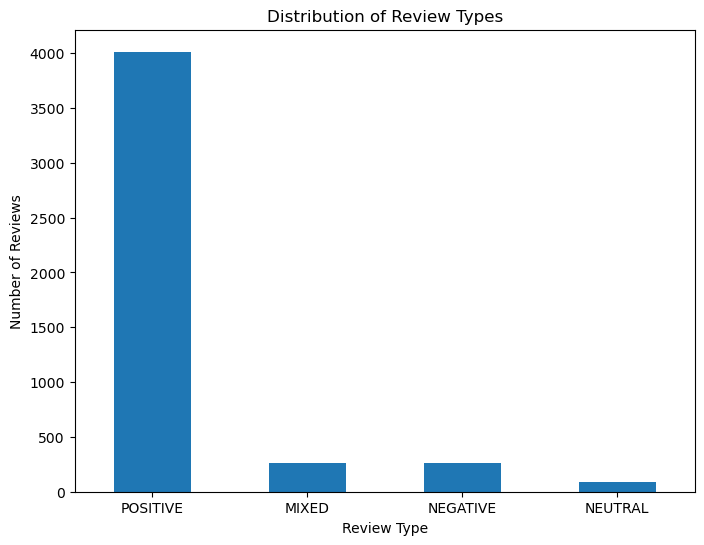

In [249]:
review_counts = df2['REVIEW TYPE'].value_counts()

# Plot the distribution of review types
plt.figure(figsize=(8, 6))
review_counts.plot(kind='bar')
plt.title('Distribution of Review Types')
plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

I find that most of the reviews has REVIEW TYPE of POSITIVE, this may result in bias in future analysis.

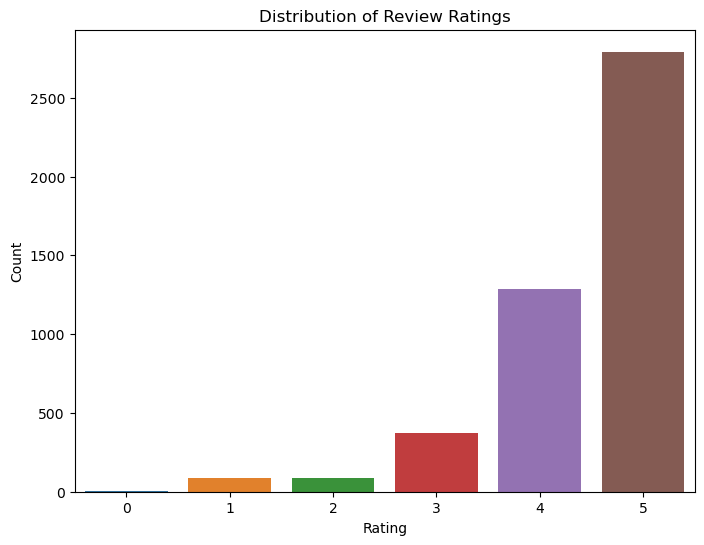

In [250]:
# Convert REVIEW DATE to datetime
df2['REVIEW DATE'] = pd.to_datetime(df2['REVIEW DATE'])

# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='REVIEW RATING', data=df2)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Most reviews have high ratings at 4 and 5 which futher proves that most reviews are positive.

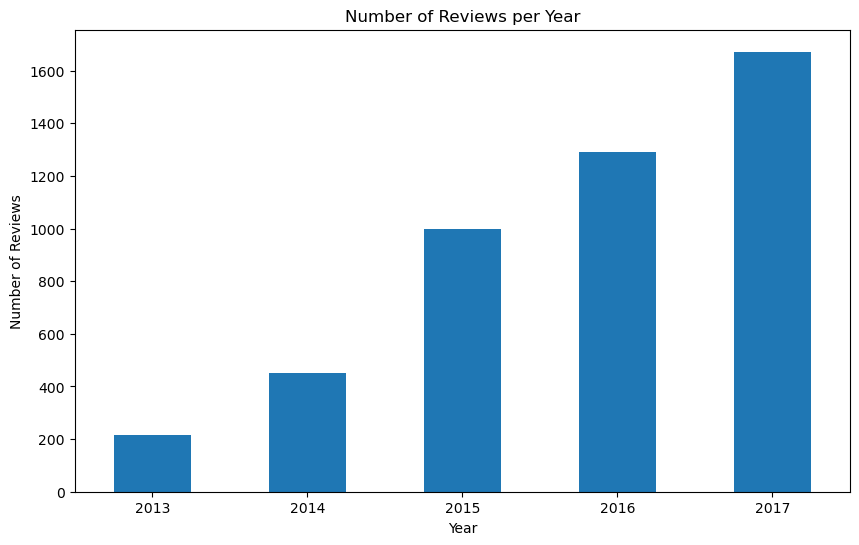

In [251]:
# Temporal Trends
# For demonstration purposes, we'll assume we want to see the count of reviews by year
df2['YEAR'] = df2['REVIEW DATE'].dt.year
reviews_per_year = df2.groupby('YEAR').size()

plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='bar')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

It is interesting to see that later years has more reviews.

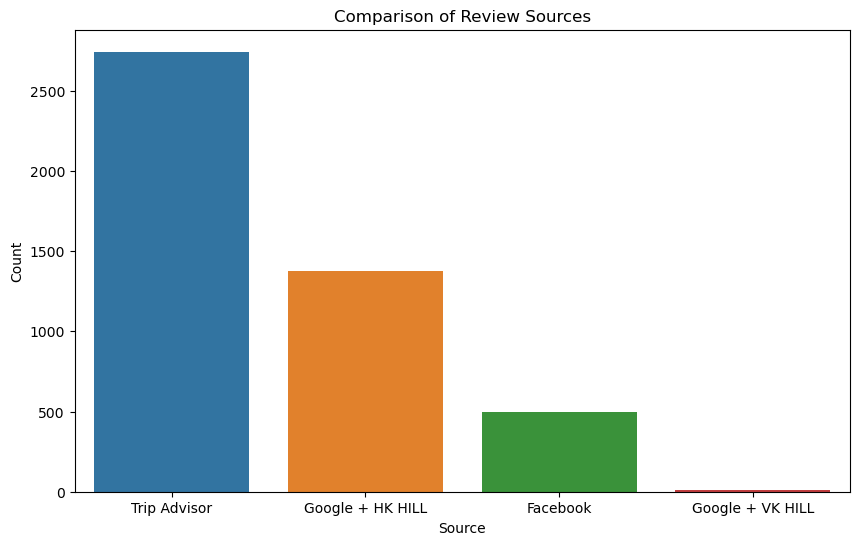

In [252]:
# Source Comparison
plt.figure(figsize=(10, 6))
sns.countplot(x='SOURCE', data=df2)
plt.title('Comparison of Review Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

Most reviews are collected from Trip Advisor.

# Question 5

Feature Extraction.

In [253]:
# Replace NaN values with empty strings
#df2['text'] = df2['text'].fillna('')

# vectorization
v = TfidfVectorizer(ngram_range=(1,1), tokenizer=word_tokenize)

sparse_matrix_tfidf = v.fit_transform(df2['text'])

tfidf_weight = sparse_matrix_tfidf.mean(axis=0).A1

words_tfidf = pd.DataFrame(tfidf_weight, index=v.get_feature_names_out(), columns=['TF-IDF Weight'])
words_tfidf.sort_values(by='TF-IDF Weight',inplace=True,ascending=False)
words_tfidf

,TF-IDF Weight
temple,0.077904
place,0.069787
visit,0.050986
good,0.043716
nice,0.043456
...,...
ingrejra,0.000006
obosthar,0.000006
teno,0.000006
obhishaap,0.000006


Feature Selection.

In [257]:
# Set the quantile threshold. Select the top 10% of TF-IDF weights.
threshold = words_tfidf['TF-IDF Weight'].quantile(0.90)

# Select words that have a TF-IDF weight above the threshold
selected_features = words_tfidf[words_tfidf['TF-IDF Weight'] > threshold].index.tolist()
selected_feature_indices = [v.vocabulary_[feature] for feature in selected_features if feature in v.vocabulary_]

Supervised ML Model for Sentiment Prediction with Data Split: 60% Training,  20% Test, 20% Validation.

In [290]:
from sklearn.metrics import accuracy_score

# X -> features, y -> label
X = sparse_matrix_tfidf[:, selected_feature_indices]
y = df2['REVIEW TYPE'].values

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the range for alpha values
alpha_range = np.arange(0.1, 1.01, 0.1)

# Placeholder for the best Laplacian Smoothing (alpha) and its corresponding accuracy
best_alpha = None
best_val_accuracy = 0

# Loop over the alpha values to find the best one
for alpha in alpha_range:
    mnb = MultinomialNB(alpha=alpha)
    mnb.fit(X_train, y_train)
    y_val_pred = mnb.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Update the best alpha if the current one is better
    if val_accuracy > best_val_accuracy:
        best_alpha = alpha
        best_val_accuracy = val_accuracy

# After finding the best alpha, print it out along with the accuracy
print(f'Best Alpha: {best_alpha}, Best Validation Accuracy: {best_val_accuracy}')

# Now, create a new model using the best alpha value and train it on the training set
mnb_best = MultinomialNB(alpha=best_alpha)
mnb_best.fit(X_train, y_train)

# Finally, evaluate this model on the test set
y_test_pred = mnb_best.predict(X_test)
print(y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')


Best Alpha: 0.1, Best Validation Accuracy: 0.8563714902807775
['POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'


I found that test accuracy is acceptable, however, all the predictions the model made is POSITIVE.

Evaluate Model Performance.

### Soft-Classifier Performance Evaluation

In [291]:
# Generate class membership probabilities
y_preb_probs = mnb.predict_proba(X_test)
y_preb_probs

array([[0.04071219, 0.04654841, 0.01461138, 0.89812801],
       [0.03067614, 0.04755061, 0.01140208, 0.91037117],
       [0.00979013, 0.0234758 , 0.00605439, 0.96067969],
       ...,
       [0.03783589, 0.03825525, 0.01076756, 0.91314129],
       [0.0536427 , 0.05897024, 0.01778846, 0.8695986 ],
       [0.03881806, 0.0372853 , 0.00860128, 0.91529536]])

In [292]:
y_valid = pd.DataFrame(y_test)
onehotencoder = OneHotEncoder()
y_valid = onehotencoder.fit_transform(y_valid).toarray()
y_valid

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [293]:
Entropy1 = -sum([np.dot(y_valid[i], np.log2(y_preb_probs[i])) for i in range(len(y_preb_probs))])
Entropy2 = -sum([np.dot(1-y_valid[i], np.log2(1-y_preb_probs[i])) for i in range(len(y_preb_probs))])
Entropy1+ Entropy2

1093.6722315339061

An entropy of 1094 is pretty high,. It means the model is not as good.

### Hard-Classifier Performance Evaluation

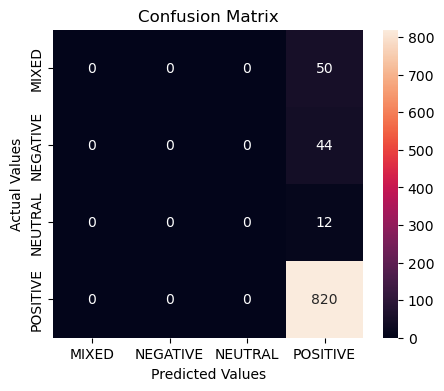

              precision    recall  f1-score   support

       MIXED       0.00      0.00      0.00        50
    NEGATIVE       0.00      0.00      0.00        44
     NEUTRAL       0.00      0.00      0.00        12
    POSITIVE       0.89      1.00      0.94       820

    accuracy                           0.89       926
   macro avg       0.22      0.25      0.23       926
weighted avg       0.78      0.89      0.83       926



In [297]:
cf_matrix=confusion_matrix(y_test,y_test_pred, labels=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'])
cf_matrix
cm_df = pd.DataFrame(cf_matrix,
                     index=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'], 
                     columns=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g') 
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_test, y_test_pred, target_names=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE']))

The confusion matrix shows that neigher MIXED, NEGATIVE nor NEUTRAL has any precision. It leads to a very low macro average precision of 0.22. It means the model might not be acceptable.

# Question 6

### Oversampling

In [315]:
oversample = SMOTE(random_state=7,k_neighbors=2)
X_oversampled, y_oversampled = oversample.fit_resample(X,y)
unique, counts = np.unique(y_oversampled, return_counts=True)
print(unique, counts)

['MIXED' 'NEGATIVE' 'NEUTRAL' 'POSITIVE'] [4013 4013 4013 4013]


In [316]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_oversampled, y_oversampled, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the range for alpha values
alpha_range = np.arange(0.1, 1.01, 0.1)

# Placeholder for the best Laplacian Smoothing (alpha) and its corresponding accuracy
best_alpha = None
best_val_accuracy = 0

# Loop over the alpha values to find the best one
for alpha in alpha_range:
    mnb = MultinomialNB(alpha=alpha)
    mnb.fit(X_train, y_train)
    y_val_pred = mnb.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Update the best alpha if the current one is better
    if val_accuracy > best_val_accuracy:
        best_alpha = alpha
        best_val_accuracy = val_accuracy

# After finding the best alpha, print it out along with the accuracy
print(f'Best Alpha: {best_alpha}, Best Validation Accuracy: {best_val_accuracy}')

# Now, create a new model using the best alpha value and train it on the training set
mnb_best = MultinomialNB(alpha=best_alpha)
mnb_best.fit(X_train, y_train)

# Finally, evaluate this model on the test set
y_test_pred = mnb_best.predict(X_test)
print(y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Best Alpha: 0.1, Best Validation Accuracy: 0.6337589535970103
['NEGATIVE' 'NEGATIVE' 'POSITIVE' ... 'MIXED' 'NEUTRAL' 'MIXED']
Test Accuracy: 0.6302180685358255


Test accuracy becomes lower, but conclusion should not be made too soon before seeing other evaluation matrices.

### Soft-Classifier Performance Evaluation

In [317]:
# Generate class membership probabilities
y_preb_probs = mnb.predict_proba(X_test)

In [318]:
y_valid = pd.DataFrame(y_test)
onehotencoder = OneHotEncoder()
y_valid = onehotencoder.fit_transform(y_valid).toarray()

In [319]:
Entropy1 = -sum([np.dot(y_valid[i], np.log2(y_preb_probs[i])) for i in range(len(y_preb_probs))])
Entropy2 = -sum([np.dot(1-y_valid[i], np.log2(1-y_preb_probs[i])) for i in range(len(y_preb_probs))])
Entropy1+ Entropy2

8770.339476766303

The entropy increased to nearly 9000 which shows that this model with oversampled data is terrible.

### Hard-Classifier Performance Evaluation

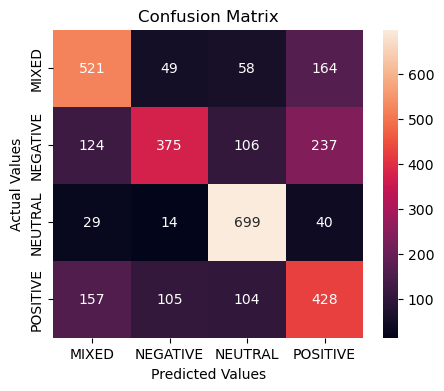

              precision    recall  f1-score   support

       MIXED       0.63      0.66      0.64       792
    NEGATIVE       0.69      0.45      0.54       842
     NEUTRAL       0.72      0.89      0.80       782
    POSITIVE       0.49      0.54      0.51       794

    accuracy                           0.63      3210
   macro avg       0.63      0.63      0.62      3210
weighted avg       0.63      0.63      0.62      3210



In [320]:
cf_matrix=confusion_matrix(y_test,y_test_pred, labels=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'])
cf_matrix
cm_df = pd.DataFrame(cf_matrix,
                     index=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'], 
                     columns=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g') 
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_test, y_test_pred, target_names=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE']))

On the other hand, since now the model generates predictions in all four categories, the macro average precision become higher to 0.63. It shows that the model improves in precision.

### Undersampling

In [321]:
undersample = NearMiss(version=1, n_neighbors=2)
X_undersample, y_undersample = undersample.fit_resample(X, y)
unique, counts = np.unique(y_undersample, return_counts=True)
print(unique, counts)

['MIXED' 'NEGATIVE' 'NEUTRAL' 'POSITIVE'] [90 90 90 90]


In [322]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_undersample, y_undersample, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the range for alpha values
alpha_range = np.arange(0.1, 1.01, 0.1)

# Placeholder for the best Laplacian Smoothing (alpha) and its corresponding accuracy
best_alpha = None
best_val_accuracy = 0

# Loop over the alpha values to find the best one
for alpha in alpha_range:
    mnb = MultinomialNB(alpha=alpha)
    mnb.fit(X_train, y_train)
    y_val_pred = mnb.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Update the best alpha if the current one is better
    if val_accuracy > best_val_accuracy:
        best_alpha = alpha
        best_val_accuracy = val_accuracy

# After finding the best alpha, print it out along with the accuracy
print(f'Best Alpha: {best_alpha}, Best Validation Accuracy: {best_val_accuracy}')

# Now, create a new model using the best alpha value and train it on the training set
mnb_best = MultinomialNB(alpha=best_alpha)
mnb_best.fit(X_train, y_train)

# Finally, evaluate this model on the test set
y_test_pred = mnb_best.predict(X_test)
print(y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Best Alpha: 0.1, Best Validation Accuracy: 0.4444444444444444
['MIXED' 'NEUTRAL' 'POSITIVE' 'MIXED' 'NEUTRAL' 'POSITIVE' 'POSITIVE'
 'NEGATIVE' 'MIXED' 'POSITIVE' 'POSITIVE' 'NEUTRAL' 'POSITIVE' 'MIXED'
 'POSITIVE' 'POSITIVE' 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'MIXED' 'POSITIVE'
 'NEGATIVE' 'NEGATIVE' 'MIXED' 'MIXED' 'MIXED' 'POSITIVE' 'POSITIVE'
 'MIXED' 'POSITIVE' 'POSITIVE' 'MIXED' 'NEUTRAL' 'MIXED' 'MIXED' 'MIXED'
 'MIXED' 'MIXED' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE' 'MIXED'
 'MIXED' 'NEGATIVE' 'NEGATIVE' 'MIXED' 'MIXED' 'NEUTRAL' 'NEUTRAL' 'MIXED'
 'POSITIVE' 'MIXED' 'MIXED' 'MIXED' 'POSITIVE' 'POSITIVE' 'MIXED'
 'POSITIVE' 'POSITIVE' 'MIXED' 'POSITIVE' 'MIXED' 'NEGATIVE' 'NEUTRAL'
 'MIXED' 'MIXED' 'NEUTRAL' 'NEUTRAL' 'MIXED' 'MIXED' 'NEGATIVE']
Test Accuracy: 0.4861111111111111


Test accuracy is now worse than random guess, lets see what other evaluation matrices show.

### Soft-Classifier Performance Evaluation

In [323]:
# Generate class membership probabilities
y_preb_probs = mnb.predict_proba(X_test)

In [324]:
y_valid = pd.DataFrame(y_test)
onehotencoder = OneHotEncoder()
y_valid = onehotencoder.fit_transform(y_valid).toarray()

In [325]:
Entropy1 = -sum([np.dot(y_valid[i], np.log2(y_preb_probs[i])) for i in range(len(y_preb_probs))])
Entropy2 = -sum([np.dot(1-y_valid[i], np.log2(1-y_preb_probs[i])) for i in range(len(y_preb_probs))])
Entropy1+ Entropy2

213.20290368994512

Surprisingly, the entropy decreased dramatically to neary 200. It means undersampling the data can improve the model by a lot.

### Hard-Classifier Performance Evaluation

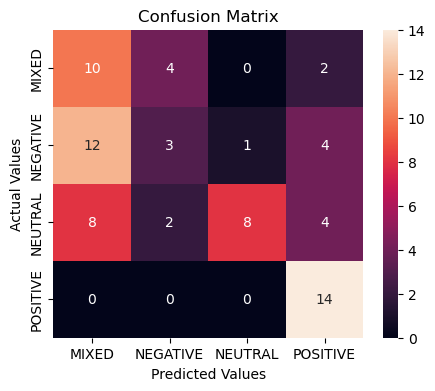

              precision    recall  f1-score   support

       MIXED       0.33      0.62      0.43        16
    NEGATIVE       0.33      0.15      0.21        20
     NEUTRAL       0.89      0.36      0.52        22
    POSITIVE       0.58      1.00      0.74        14

    accuracy                           0.49        72
   macro avg       0.53      0.53      0.47        72
weighted avg       0.55      0.49      0.46        72



In [326]:
cf_matrix=confusion_matrix(y_test,y_test_pred, labels=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'])
cf_matrix
cm_df = pd.DataFrame(cf_matrix,
                     index=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'], 
                     columns=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g') 
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_test, y_test_pred, target_names=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE']))

It is interesting to see that the precision for REVIEW TYPE of NEUTRAL becomes very high. However, other categories' performance is mediocore and it leads to a slightly better overall macro average precision than the original modal.

# Question 7

Predict the Sentiment of the Review using Unsupervised Learning.

In [333]:
from afinn import Afinn

def lexicon_based_approach(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Score each word using Afinn and sum the scores
    total_score = sum(Afinn().score(word) for word in words)
    return total_score

df2['affin_score'] = df2['text'].apply(lexicon_based_approach)
df2['affin_score']

0        3.0
1        5.0
2        3.0
3       11.0
4        4.0
        ... 
4627    -1.0
4628    11.0
4629     2.0
4630     4.0
4631     6.0
Name: affin_score, Length: 4630, dtype: float64

# Question 8

From this text-mining endeavor, I've gleaned several critical insights. Firstly, tasks like translation and spelling correction are notably time-intensive, which underscores the importance of efficient preprocessing in natural language processing workflows. Additionally, adjusting the Laplacian Smoothing parameter, alpha, had a negligible effect on training accuracy for this specific case, indicating a level of robustness or perhaps the minimal impact of smoothing given the dataset's characteristics. Another significant learning was the influence of imbalanced data on model performance, which often resulted in skewed evaluations. To mitigate the effects of data imbalance, strategies like oversampling and undersampling were considered. Interestingly, undersampling generally outperformed oversampling. This suggests that reducing the dataset to balance classes can be more effective than artificially augmenting it, which could introduce noise or overfitting due to repetitive, synthetic data.